In [ ]:

import zipfile
import os



# 2. Set paths
zip_path = '/content/drive/MyDrive/Transfer  Learning/Lab/Exp-2/Dataset/archive (6).zip'  # Replace with your ZIP file path
extract_to = '/content/drive/MyDrive/Transfer  Learning/Lab/Exp-2/Dataset'  # Replace with destination folder

# 3. Create destination folder if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# 4. Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"✅ Files extracted to: {extract_to}")


✅ Files extracted to: /content/drive/MyDrive/Transfer  Learning/Lab/Exp-2/Dataset


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model

In [ ]:
dataset_path = '/content/drive/MyDrive/Transfer  Learning/Lab/Exp-2/Dataset/Agricultural-crops'

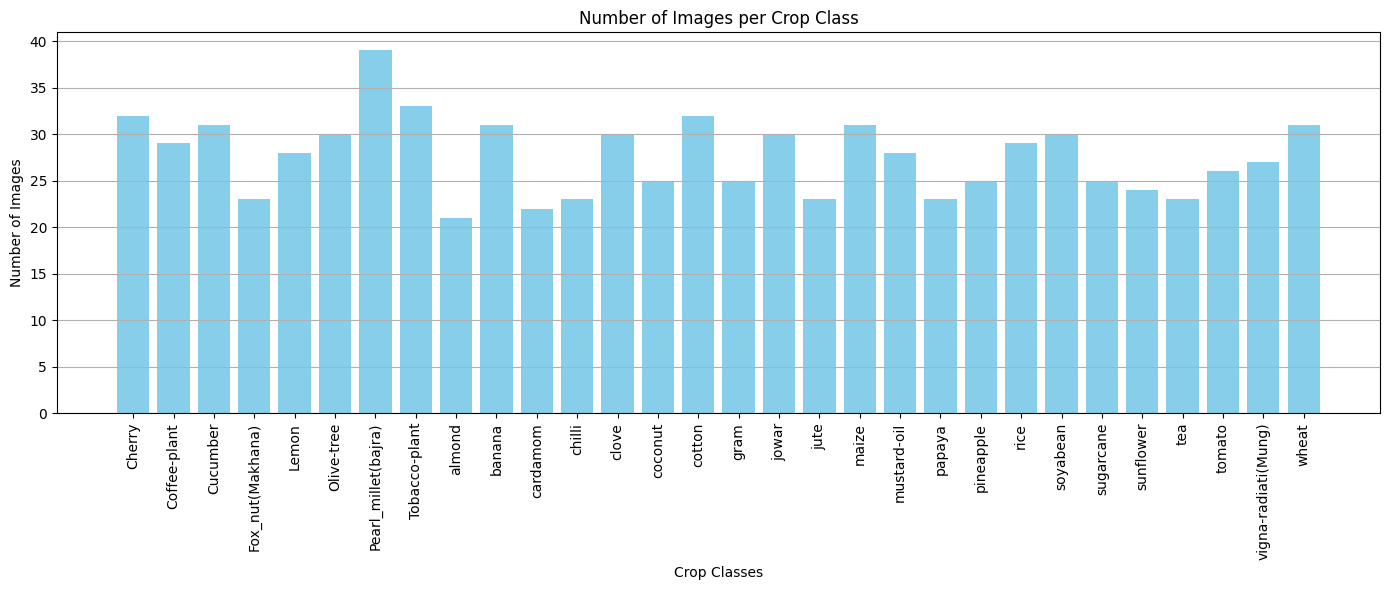

In [ ]:
class_counts = {}
for class_folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(folder_path):
        class_counts[class_folder] = len(os.listdir(folder_path))

# Plot bar chart
plt.figure(figsize=(14, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=90)
plt.title("Number of Images per Crop Class")
plt.xlabel("Crop Classes")
plt.ylabel("Number of Images")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
img_height, img_width = 224, 224
batch_size = 32


train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)



val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 674 images belonging to 30 classes.
Found 155 images belonging to 30 classes.


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 26,781,148 (102.16 MB)

 Trainable params: 1,064,478 (4.06 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2,128,958 (8.12 MB)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 188s 8s/step - accuracy: 0.0556 - loss: 3.5927 - val_accuracy: 0.2194 - val_loss: 2.8652
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 184s 7s/step - accuracy: 0.3862 - loss: 2.4227 - val_accuracy: 0.4194 - val_loss: 2.2486
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 162s 7s/step - accuracy: 0.6629 - loss: 1.6404 - val_accuracy: 0.5677 - val_loss: 1.8375
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 168s 8s/step - accuracy: 0.8023 - loss: 1.1375 - val_accuracy: 0.5871 - val_loss: 1.6460
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 158s 7s/step - accuracy: 0.8626 - loss: 0.8686 - val_accuracy: 0.6387 - val_loss: 1.4474
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 163s 7s/step - accuracy: 0.8822 - loss: 0.7110 - val_accuracy: 0.6516 - val_loss: 1.3147
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 163s 7s/step - accuracy: 0.9288 - loss: 0.5325 - val_accuracy: 0.7097 - val_loss: 1.2319
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 178s 8s/step - accuracy: 0.9536 - loss: 0.4398 - val_accuracy: 0.7226 - v

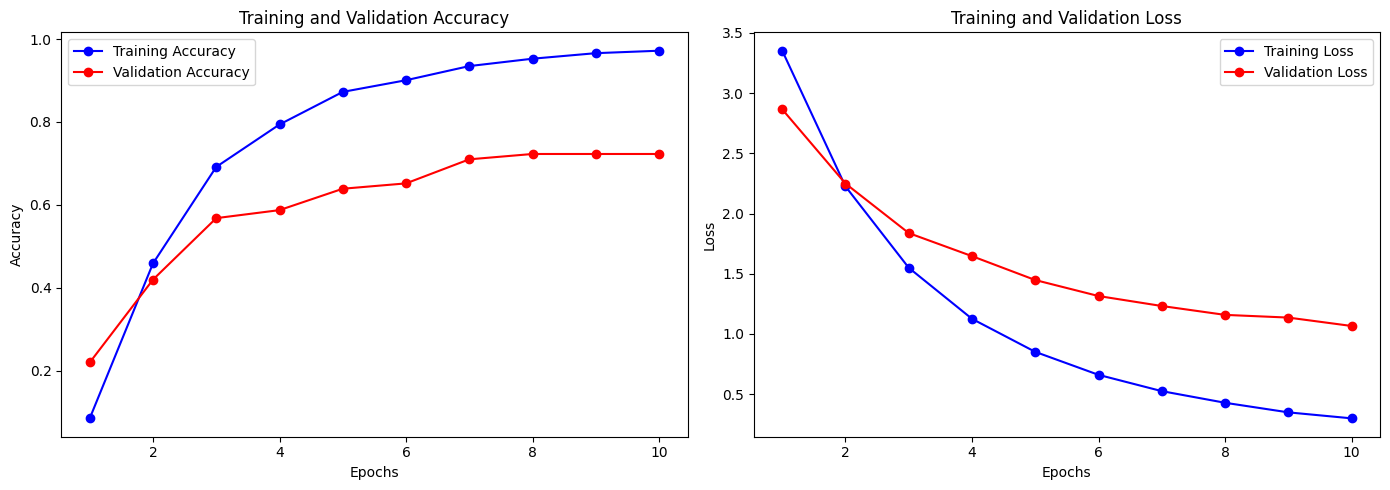

In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


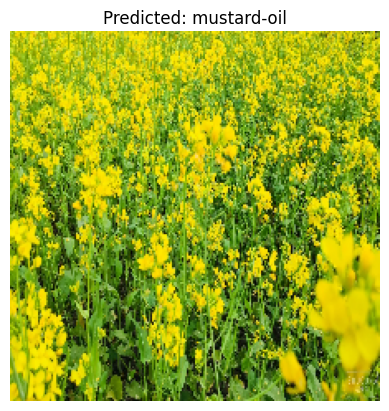

In [ ]:
def predict_sample(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_label = list(train_generator.class_indices.keys())[class_idx]

    plt.imshow(img)
    plt.title(f'Predicted: {class_label}')
    plt.axis('off')
    plt.show()

# Example prediction
predict_sample('/content/drive/MyDrive/Transfer  Learning/Lab/Exp-2/Dataset/Agricultural-crops/mustard-oil/image (1).png')

5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 6s/step


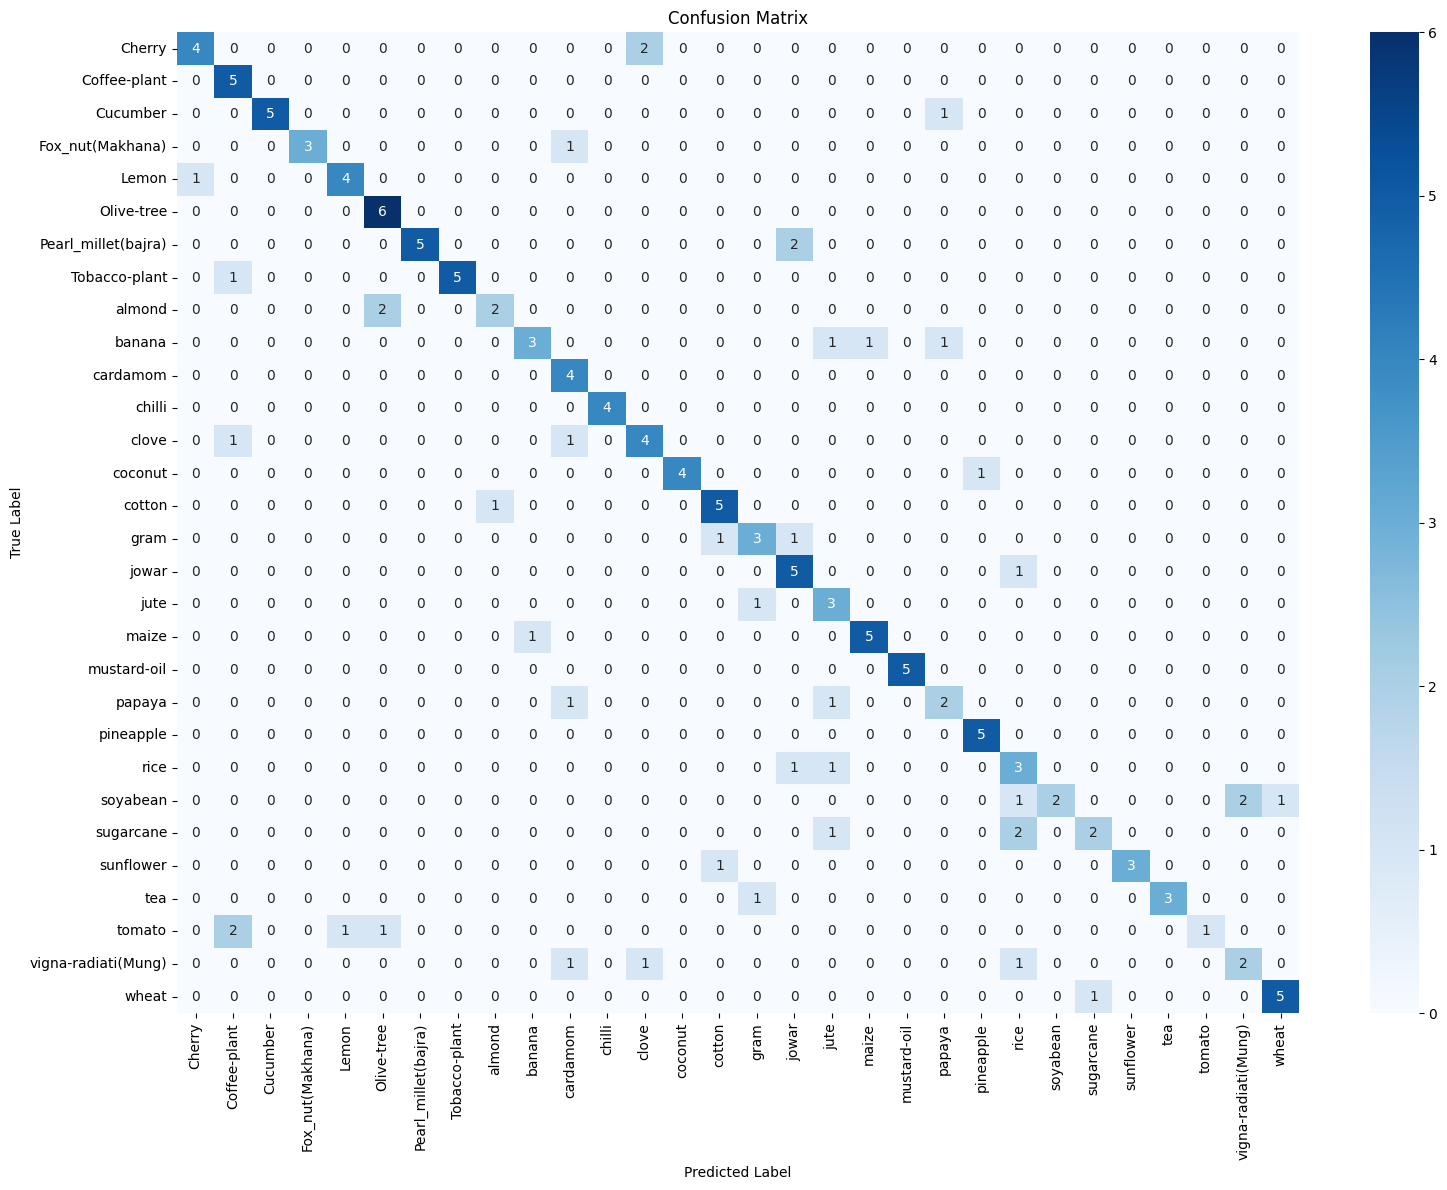

Classification Report:

                     precision    recall  f1-score   support

             Cherry       0.80      0.67      0.73         6
       Coffee-plant       0.56      1.00      0.71         5
           Cucumber       1.00      0.83      0.91         6
   Fox_nut(Makhana)       1.00      0.75      0.86         4
              Lemon       0.80      0.80      0.80         5
         Olive-tree       0.67      1.00      0.80         6
Pearl_millet(bajra)       1.00      0.71      0.83         7
      Tobacco-plant       1.00      0.83      0.91         6
             almond       0.67      0.50      0.57         4
             banana       0.75      0.50      0.60         6
           cardamom       0.50      1.00      0.67         4
             chilli       1.00      1.00      1.00         4
              clove       0.57      0.67      0.62         6
            coconut       1.00      0.80      0.89         5
             cotton       0.71      0.83      0.77         6

In [ ]:
val_generator.reset()
y_pred = model.predict(val_generator, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Print classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))